In [1]:
'''register_matplotlib_converters is used to work with datetime data'''
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
bikesharing_data = pd.read_csv('C:/Users/aanand/Desktop/Python-Data/bike_sharing_daily.csv')

bikesharing_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

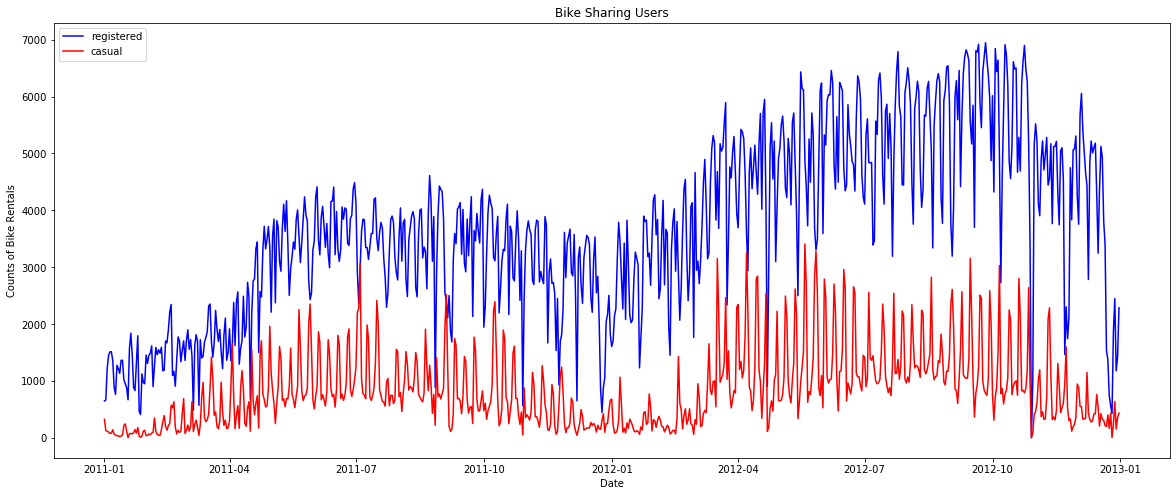

In [5]:
'''See the bike rentals based on the registered users of the company or casual users. Registered users are higher than casual users '''

plt.figure(figsize=(20,8))

plt.plot(bikesharing_data['dteday'],
        bikesharing_data['registered'],
        color = 'b', label = 'registered')

plt.plot(bikesharing_data['dteday'],
        bikesharing_data['casual'],
        color = 'r', label = 'casual')

plt.legend(loc = 'upper left')
plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [14]:
'''Lets group by year and see the count on yearly basis'''

year_df = bikesharing_data.groupby('yr', as_index= False).mean()

year_df[['yr','cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


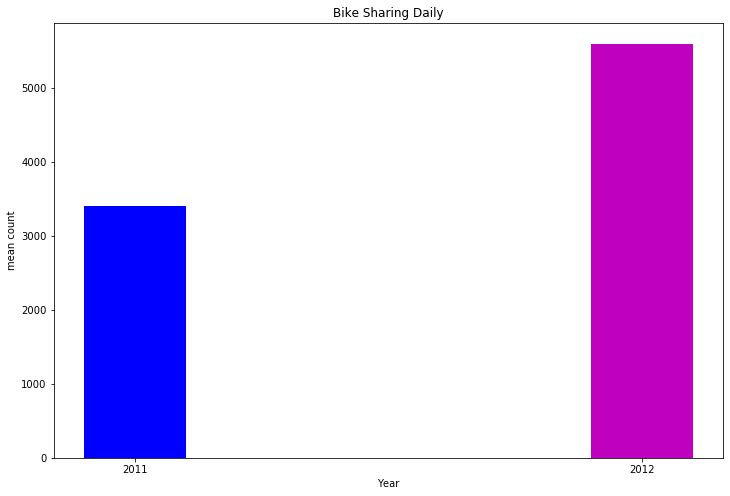

In [15]:
'''More bikes have been rented and seems like business has improved'''
plt.figure(figsize=(12,8))

colors = ['b','m']

plt.bar(year_df['yr'], year_df['cnt'],
       width = 0.2, color = colors)

plt.xticks([0,1],['2011','2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('Year')
plt.ylabel('mean count')

plt.show()

In [19]:
'''Calculating average number of bike rented across working days and non-working days'''

days = bikesharing_data.groupby('workingday', as_index=False).mean()

days['cnt']

0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

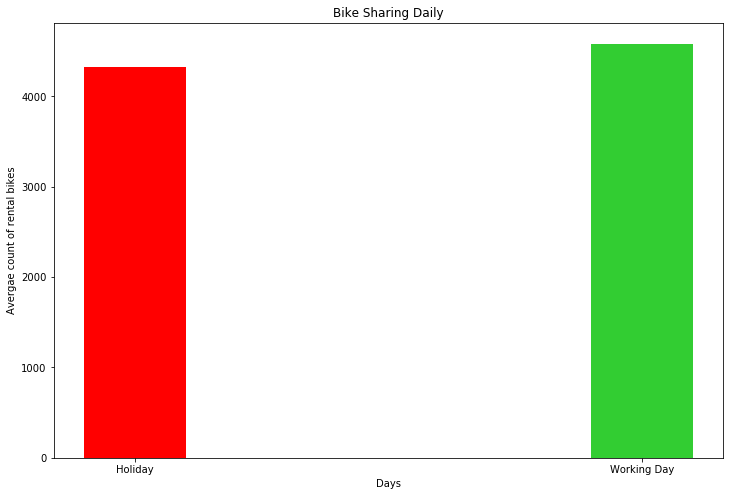

In [22]:
'''Slightly more bikes are rented average on working days'''
plt.figure(figsize=(12,8))

plt.bar(days['workingday'], days['cnt'],
       width = 0.2, color=['red','limegreen'])

plt.xticks([0,1],['Holiday','Working Day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Avergae count of rental bikes')

plt.show()

In [23]:
'''Filtering out the data for just year 1 i.e. 2012'''
year_data = bikesharing_data.loc[bikesharing_data['yr']== 1]

year_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [24]:
year_data.shape

(366, 16)

In [26]:
'''Seeing any monthly variations in the number of bikes rented'''
month_df = year_data[['mnth','cnt']].groupby('mnth', as_index = False).mean()

month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [28]:
'''Replacing month ids with month names'''
month_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                        ['Jan','Feb','Mar','Apr','May','Jun','Jul',
                         'Aug','Sep','Oct','Nov','Dec'], inplace = True)

month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


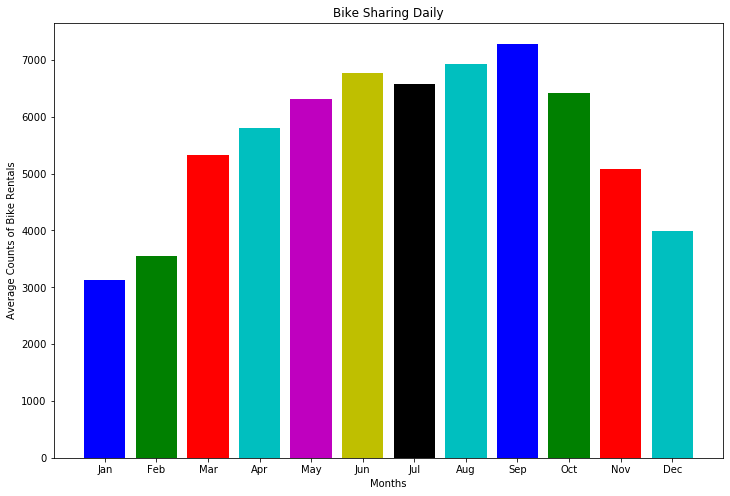

In [29]:
'''September has the highest bikes rentals'''
colors = ['b','g','r','c','m','y','k','c']

plt.figure(figsize=(12,8))

plt.bar(month_df['mnth'],month_df['cnt'], color = colors)

plt.title('Bike Sharing Daily')
plt.xlabel('Months')
plt.ylabel('Average Counts of Bike Rentals')

plt.show()

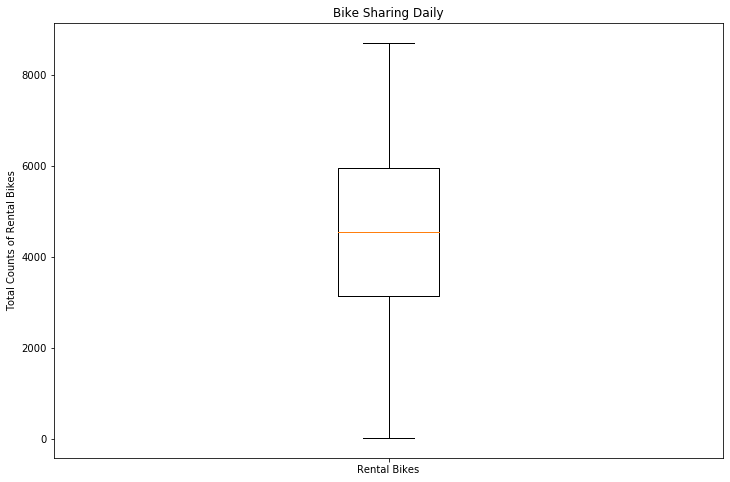

In [33]:
plt.figure(figsize=(12,8))

plt.boxplot(bikesharing_data['cnt'])

plt.xticks([1], ['Rental Bikes'])
plt.title('Bike Sharing Daily')
plt.ylabel('Total Counts of Rental Bikes')

plt.show()

In [35]:
select_bike_data = bikesharing_data[['casual','registered']]
select_bike_data.head()

,casual,registered
0,331,654
1,131,670
2,120,1229
3,108,1454
4,82,1518


In [36]:
columns = select_bike_data.columns

In [37]:
columns

Index(['casual', 'registered'], dtype='object')

In [38]:
bike_data_array = select_bike_data.values

In [39]:
bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]], dtype=int64)

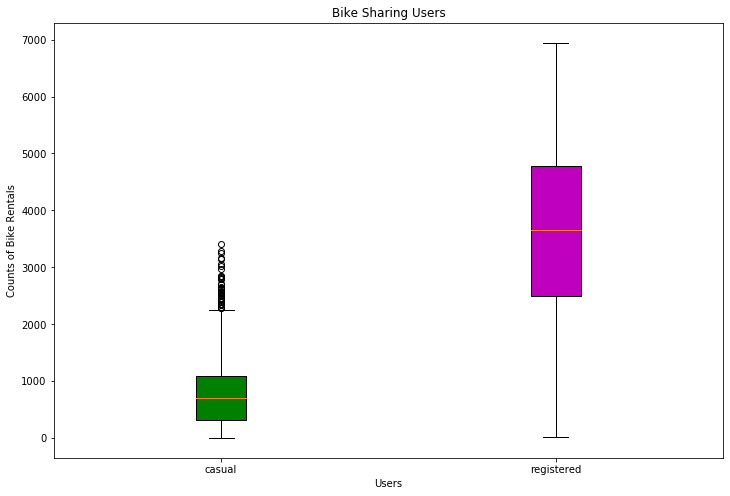

In [41]:
'''Casual renters has many outliers and registered users has 0 outliers'''
plt.figure(figsize=(12,8))
colors = ['g','m']

bp = plt.boxplot(bike_data_array,
                patch_artist=True,
                labels = columns)

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor = colors[i])
    
plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

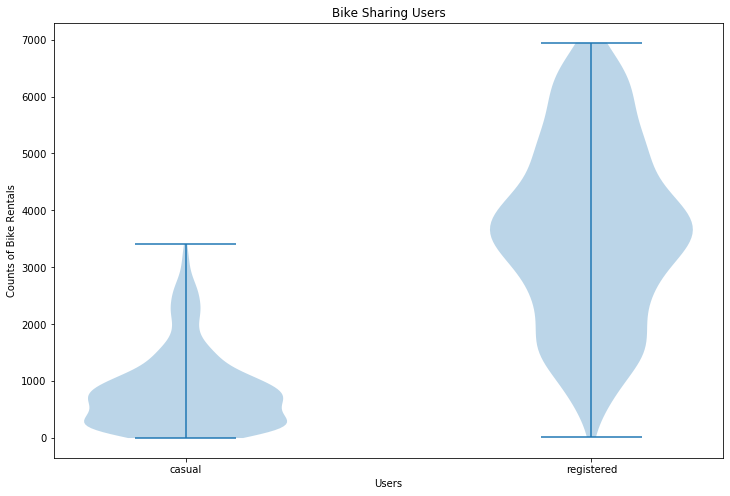

In [42]:
'''Using violinplot, we can see the data density as to how the data is spread'''

plt.figure(figsize=(12,8))

vp = plt.violinplot(bike_data_array)

plt.xticks([1,2], columns)

plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [46]:
bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [51]:
season_data = bikesharing_data[['season','cnt']]

season_data.head(5)

,season,cnt
0,1,985
1,1,801
2,1,1349
3,1,1562
4,1,1600


In [52]:
'''Number of bikes rented per season '''
grouped_data = season_data.groupby('season', as_index=False).sum()

grouped_data.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [53]:
'''Performing an inpace replacement of seasons denoted by numbers to season names. Also, it shows than fall is the most influential season for bikers'''
grouped_data['season'].replace([1,2,3,4],
                              ['spring','summer','fall','winter'],
                              inplace = True)
grouped_data

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


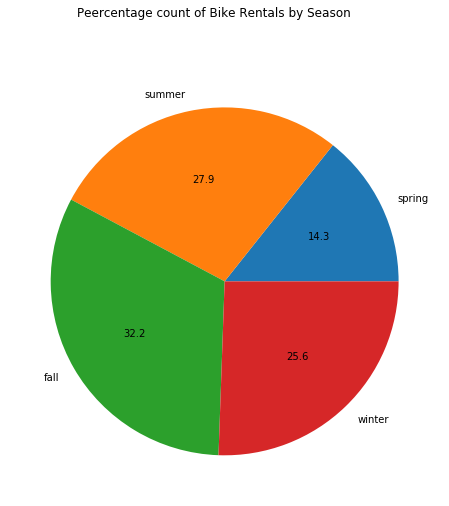

In [54]:
plt.figure(figsize=(12,8))

plt.pie(grouped_data['cnt'], 
       labels=grouped_data['season'],
       autopct='%.1f')

plt.suptitle('Peercentage count of Bike Rentals by Season')

plt.show()

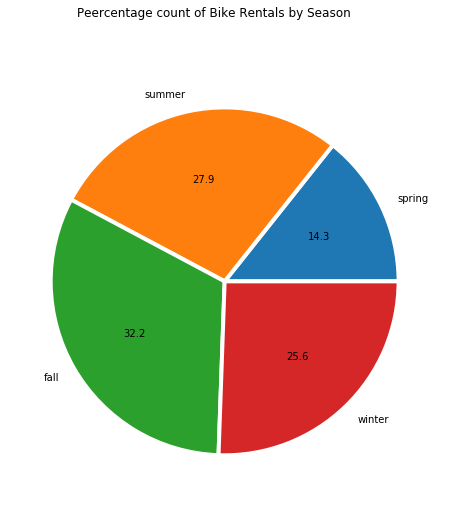

In [55]:
plt.figure(figsize=(12,8))

plt.pie(grouped_data['cnt'], 
       labels=grouped_data['season'],
       autopct='%.1f',
       wedgeprops={'linewidth' : 4,'edgecolor' : "white"})

plt.suptitle('Peercentage count of Bike Rentals by Season')

plt.show()

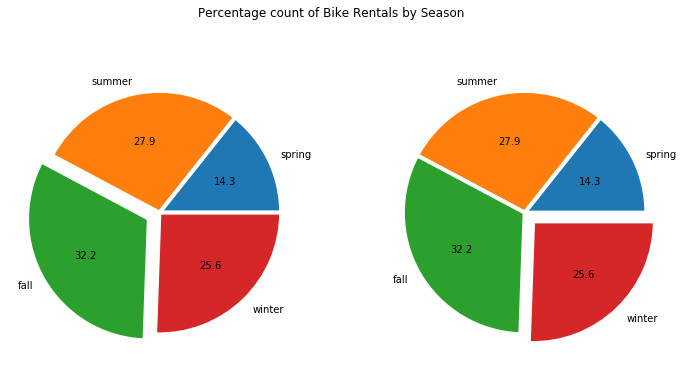

In [59]:
explode_max = (0,0,0.1,0)
explode_min = (0,0,0,0.1)

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.pie(grouped_data['cnt'], 
       labels=grouped_data['season'],
       autopct='%.1f',
        explode = explode_max,
       wedgeprops={'linewidth' : 4,'edgecolor' : "white"})

ax2.pie(grouped_data['cnt'], 
       labels=grouped_data['season'],
       autopct='%.1f',
        explode = explode_min,
       wedgeprops={'linewidth' : 4,'edgecolor' : "white"})

plt.suptitle('Percentage count of Bike Rentals by Season')
plt.show()
